In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [222]:
# Load our image
binary_warped = mpimg.imread('warped-example.jpg')
binary_warped.shape

(720, 1280)

In [223]:
binary_warped

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

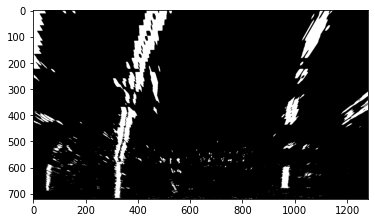

In [224]:
plt.imshow(binary_warped, cmap = 'gray')

In [225]:
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)

In [226]:
histogram

array([1554, 1306, 1292, ..., 5091, 5097, 5347], dtype=uint64)

In [227]:
histogram.shape

(1280,)

In [228]:
# Create an output image to draw on and visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))
out_img.shape

(720, 1280, 3)

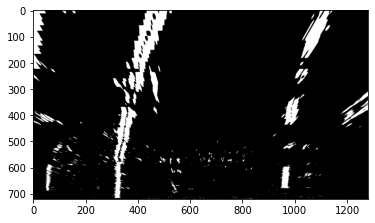

In [229]:
plt.imshow(out_img, cmap = 'gray')

In [230]:
mid_point = histogram.shape[0] // 2
mid_point

640

In [231]:
histogram[ : mid_point]

array([ 1554,  1306,  1292,  1546,  1293,  1556,  1807,  2306,  2814,
        3074,  2822,  3322,  3320,  3333,  3578,  3329,  3322,  3079,
        3068,  3081,  3073,  3328,  2830,  3078,  3070,  3075,  3577,
        3836,  4339,  4096,  5099,  5610,  5601,  5864,  5867,  5852,
        5856,  5605,  5602,  5345,  5629,  5395,  5618,  5373,  5385,
        5369,  5643,  6140,  7471,  9226, 13053, 17588, 22150, 25202,
       26223, 27238, 28250, 28736, 28527, 26736, 25726, 22673, 20648,
       18621, 16822, 15316, 14793, 12012,  9980,  9471,  7974,  6155,
        6423,  5681,  5153,  5424,  4654,  4643,  4652,  4652,  5137,
        4889,  4889,  5148,  5158,  4388,  4152,  4637,  4618,  4622,
        4635,  5634,  5894,  6643,  6888,  8174,  7933,  7685,  7947,
        7422,  6918,  6656,  6661,  6401,  5872,  5900,  5122,  5122,
        5129,  5112,  3357,  3096,  2563,  1564,   791,   287,    25,
          28,    29,    25,    15,    18,    19,    19,   270,   783,
         525,   773,

In [232]:
np.argmax(histogram[ : mid_point]), np.max(histogram[ : mid_point])

(327, 62445)

In [233]:
np.argmax(histogram[ mid_point : ]), np.max(histogram[ mid_point : ])

(331, 41551)

In [234]:
np.argmax(histogram[ mid_point : ]) + mid_point

971

In [235]:
midpoint = int(histogram.shape[0] // 2)

leftx_base = np.argmax(histogram[: midpoint])
rightx_base = np.argmax(histogram[midpoint : ]) + midpoint

In [236]:
leftx_base, rightx_base

(327, 971)

In [237]:
nwindows = 9
margin = 100
minpix = 50

In [238]:
window_height = int(binary_warped.shape[0] // nwindows)

In [239]:
window_height

80

In [240]:
nonzero = np.nonzero(binary_warped)
nonzero

(array([  0,   0,   0, ..., 719, 719, 719]),
 array([   0,    1,    2, ..., 1051, 1067, 1069]))

In [241]:
nonzeroy = np.array(nonzero[0])
nonzeroy

array([  0,   0,   0, ..., 719, 719, 719])

In [294]:
nonzeroy.shape

(89486,)

In [242]:
nonzerox = np.array(nonzero[1])
nonzerox

array([   0,    1,    2, ..., 1051, 1067, 1069])

In [243]:
leftx_current = leftx_base
rightx_current = rightx_base

In [244]:
left_lane_inds = []
right_lane_inds = []

In [245]:
left_lane_inds

[]

In [246]:
window = 0

In [247]:
win_y_high = binary_warped.shape[0] - window * window_height
win_y_high

720

In [248]:
win_y_low = binary_warped.shape[0] - (window + 1) * window_height
win_y_low

640

In [249]:
win_xleft_low = np.max([leftx_current - margin, 0])
win_xleft_low

227

In [250]:
win_xleft_high = np.min([leftx_current + margin, binary_warped.shape[1]])
win_xleft_high

427

In [251]:
win_xright_low = np.max([rightx_current - margin, 0])
win_xright_low

871

In [252]:
win_xright_high = np.min([rightx_current + margin, binary_warped.shape[1]])
win_xright_high

1071

In [253]:
cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0, 255, 0), 2)
cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high), (0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

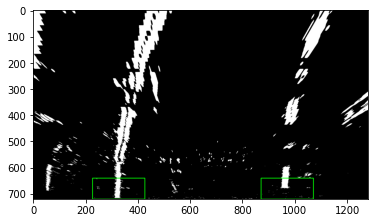

In [254]:
plt.imshow(out_img, cmap = 'gray')

In [255]:
good_left_inds = []
good_right_inds = []

for i in range(len(nonzeroy)):    
    y = nonzeroy[i]
    x = nonzerox[i]
    
    if (win_y_low <= y) & (y <= win_y_high):
        if (win_xleft_low <= x) & (x <= win_xleft_high):
            good_left_inds.append([y, x])
        if (win_xright_low <= x) & (x <= win_xright_high):            
            good_right_inds.append([y, x])                           

In [256]:
len(good_left_inds)

2414

In [257]:
good_left_inds

[[640, 240],
 [640, 243],
 [640, 247],
 [640, 312],
 [640, 315],
 [640, 319],
 [640, 320],
 [640, 321],
 [640, 322],
 [640, 323],
 [640, 324],
 [640, 325],
 [640, 326],
 [640, 327],
 [640, 328],
 [640, 329],
 [640, 330],
 [640, 331],
 [640, 332],
 [640, 335],
 [641, 241],
 [641, 242],
 [641, 244],
 [641, 316],
 [641, 317],
 [641, 319],
 [641, 320],
 [641, 321],
 [641, 322],
 [641, 323],
 [641, 324],
 [641, 325],
 [641, 326],
 [641, 327],
 [641, 328],
 [641, 329],
 [641, 330],
 [641, 331],
 [641, 332],
 [641, 333],
 [642, 240],
 [642, 241],
 [642, 244],
 [642, 246],
 [642, 314],
 [642, 315],
 [642, 318],
 [642, 319],
 [642, 320],
 [642, 321],
 [642, 322],
 [642, 323],
 [642, 324],
 [642, 325],
 [642, 326],
 [642, 327],
 [642, 328],
 [642, 329],
 [642, 330],
 [642, 331],
 [642, 332],
 [642, 334],
 [643, 241],
 [643, 242],
 [643, 243],
 [643, 244],
 [643, 245],
 [643, 247],
 [643, 312],
 [643, 313],
 [643, 316],
 [643, 319],
 [643, 320],
 [643, 321],
 [643, 322],
 [643, 323],
 [643, 324],

In [258]:
len(good_right_inds)

1873

In [259]:
good_right_inds

[[640, 946],
 [640, 947],
 [640, 950],
 [640, 951],
 [640, 952],
 [640, 953],
 [640, 954],
 [640, 955],
 [640, 956],
 [640, 957],
 [640, 958],
 [640, 959],
 [640, 960],
 [640, 961],
 [640, 962],
 [640, 963],
 [640, 964],
 [640, 965],
 [640, 966],
 [640, 967],
 [640, 968],
 [640, 969],
 [640, 970],
 [640, 971],
 [640, 972],
 [640, 973],
 [640, 974],
 [640, 975],
 [640, 976],
 [640, 979],
 [640, 981],
 [640, 982],
 [640, 1048],
 [640, 1050],
 [640, 1051],
 [640, 1052],
 [640, 1053],
 [640, 1054],
 [641, 944],
 [641, 945],
 [641, 946],
 [641, 947],
 [641, 948],
 [641, 949],
 [641, 951],
 [641, 952],
 [641, 953],
 [641, 954],
 [641, 955],
 [641, 956],
 [641, 957],
 [641, 958],
 [641, 959],
 [641, 960],
 [641, 961],
 [641, 962],
 [641, 963],
 [641, 964],
 [641, 965],
 [641, 966],
 [641, 967],
 [641, 968],
 [641, 969],
 [641, 970],
 [641, 971],
 [641, 972],
 [641, 973],
 [641, 974],
 [641, 975],
 [641, 976],
 [641, 977],
 [641, 978],
 [641, 1048],
 [641, 1049],
 [641, 1052],
 [642, 946],
 [6

In [260]:
left_lane_inds.append(good_left_inds)

In [261]:
len(left_lane_inds)

1

In [262]:
left_lane_inds

[[[640, 240],
  [640, 243],
  [640, 247],
  [640, 312],
  [640, 315],
  [640, 319],
  [640, 320],
  [640, 321],
  [640, 322],
  [640, 323],
  [640, 324],
  [640, 325],
  [640, 326],
  [640, 327],
  [640, 328],
  [640, 329],
  [640, 330],
  [640, 331],
  [640, 332],
  [640, 335],
  [641, 241],
  [641, 242],
  [641, 244],
  [641, 316],
  [641, 317],
  [641, 319],
  [641, 320],
  [641, 321],
  [641, 322],
  [641, 323],
  [641, 324],
  [641, 325],
  [641, 326],
  [641, 327],
  [641, 328],
  [641, 329],
  [641, 330],
  [641, 331],
  [641, 332],
  [641, 333],
  [642, 240],
  [642, 241],
  [642, 244],
  [642, 246],
  [642, 314],
  [642, 315],
  [642, 318],
  [642, 319],
  [642, 320],
  [642, 321],
  [642, 322],
  [642, 323],
  [642, 324],
  [642, 325],
  [642, 326],
  [642, 327],
  [642, 328],
  [642, 329],
  [642, 330],
  [642, 331],
  [642, 332],
  [642, 334],
  [643, 241],
  [643, 242],
  [643, 243],
  [643, 244],
  [643, 245],
  [643, 247],
  [643, 312],
  [643, 313],
  [643, 316],
  [643

In [263]:
right_lane_inds.append(good_right_inds)

In [264]:
good_right_inds

[[640, 946],
 [640, 947],
 [640, 950],
 [640, 951],
 [640, 952],
 [640, 953],
 [640, 954],
 [640, 955],
 [640, 956],
 [640, 957],
 [640, 958],
 [640, 959],
 [640, 960],
 [640, 961],
 [640, 962],
 [640, 963],
 [640, 964],
 [640, 965],
 [640, 966],
 [640, 967],
 [640, 968],
 [640, 969],
 [640, 970],
 [640, 971],
 [640, 972],
 [640, 973],
 [640, 974],
 [640, 975],
 [640, 976],
 [640, 979],
 [640, 981],
 [640, 982],
 [640, 1048],
 [640, 1050],
 [640, 1051],
 [640, 1052],
 [640, 1053],
 [640, 1054],
 [641, 944],
 [641, 945],
 [641, 946],
 [641, 947],
 [641, 948],
 [641, 949],
 [641, 951],
 [641, 952],
 [641, 953],
 [641, 954],
 [641, 955],
 [641, 956],
 [641, 957],
 [641, 958],
 [641, 959],
 [641, 960],
 [641, 961],
 [641, 962],
 [641, 963],
 [641, 964],
 [641, 965],
 [641, 966],
 [641, 967],
 [641, 968],
 [641, 969],
 [641, 970],
 [641, 971],
 [641, 972],
 [641, 973],
 [641, 974],
 [641, 975],
 [641, 976],
 [641, 977],
 [641, 978],
 [641, 1048],
 [641, 1049],
 [641, 1052],
 [642, 946],
 [6

In [265]:
np.array(good_left_inds)[:, 1:2] 

array([[240],
       [243],
       [247],
       ...,
       [336],
       [339],
       [343]])

In [266]:
if len(good_left_inds) > minpix:
    leftx_current = np.mean( np.array(good_left_inds)[:, 1:2] )
    
leftx_current

319.8396851698426

In [267]:
if len(good_right_inds) > minpix:
    rightx_current = np.mean( np.array(good_right_inds)[:, 1:2] )
    
rightx_current

968.300053390283

In [268]:
left_lane_inds = np.concatenate(left_lane_inds)

In [269]:
right_lane_inds = np.concatenate(right_lane_inds)

In [271]:
left_lane_inds

array([[640, 240],
       [640, 243],
       [640, 247],
       ...,
       [719, 336],
       [719, 339],
       [719, 343]])

In [295]:
left_lane_inds.shape

(2414, 2)

In [293]:
nonzerox

array([   0,    1,    2, ..., 1051, 1067, 1069])

In [296]:
nonzerox.shape

(89486,)

In [279]:
left_lane_inds[:, 1]

array([240, 243, 247, ..., 336, 339, 343])

In [297]:
leftx = left_lane_inds[:, 1]
lefty = left_lane_inds[:, 0]

rightx = right_lane_inds[:, 1]
righty = right_lane_inds[:, 0]

In [298]:
leftx 

array([240, 243, 247, ..., 336, 339, 343])

In [299]:
lefty

array([640, 640, 640, ..., 719, 719, 719])

In [300]:
rightx

array([ 946,  947,  950, ..., 1051, 1067, 1069])

In [301]:
righty

array([640, 640, 640, ..., 719, 719, 719])

In [302]:
left_fit = np.polyfit(lefty, leftx, 2)
left_fit

array([-7.13379652e-03,  9.62962374e+00, -2.92632402e+03])

In [303]:
right_fit = np.polyfit(righty, rightx, 2)
right_fit

array([ 2.19258829e-02, -2.94732968e+01,  1.08621995e+04])

In [306]:
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
ploty

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [309]:
left_fitx = left_fit[0] * (ploty**2) + left_fit[1] * ploty + left_fit[2]
left_fitx

array([-2.92632402e+03, -2.91670153e+03, -2.90709330e+03, -2.89749935e+03,
       -2.88791966e+03, -2.87835424e+03, -2.86880309e+03, -2.85926621e+03,
       -2.84974359e+03, -2.84023524e+03, -2.83074116e+03, -2.82126135e+03,
       -2.81179580e+03, -2.80234452e+03, -2.79290751e+03, -2.78348477e+03,
       -2.77407629e+03, -2.76468208e+03, -2.75530214e+03, -2.74593647e+03,
       -2.73658506e+03, -2.72724792e+03, -2.71792505e+03, -2.70861645e+03,
       -2.69932211e+03, -2.69004205e+03, -2.68077625e+03, -2.67152471e+03,
       -2.66228745e+03, -2.65306445e+03, -2.64385572e+03, -2.63466126e+03,
       -2.62548106e+03, -2.61631514e+03, -2.60716348e+03, -2.59802609e+03,
       -2.58890296e+03, -2.57979411e+03, -2.57069952e+03, -2.56161920e+03,
       -2.55255314e+03, -2.54350136e+03, -2.53446384e+03, -2.52544059e+03,
       -2.51643160e+03, -2.50743689e+03, -2.49845644e+03, -2.48949026e+03,
       -2.48053834e+03, -2.47160070e+03, -2.46267732e+03, -2.45376821e+03,
       -2.44487337e+03, -

In [310]:
right_fitx = right_fit[0] * (ploty**2) + right_fit[1] * ploty + right_fit[2]
right_fitx

array([10862.19946255, 10832.74809164, 10803.34057251, 10773.97690514,
       10744.65708954, 10715.3811257 , 10686.14901362, 10656.96075332,
       10627.81634478, 10598.715788  , 10569.65908299, 10540.64622975,
       10511.67722827, 10482.75207856, 10453.87078062, 10425.03333444,
       10396.23974002, 10367.48999737, 10338.78410649, 10310.12206737,
       10281.50388002, 10252.92954444, 10224.39906062, 10195.91242856,
       10167.46964828, 10139.07071976, 10110.715643  , 10082.40441801,
       10054.13704478, 10025.91352333,  9997.73385363,  9969.59803571,
        9941.50606954,  9913.45795515,  9885.45369252,  9857.49328166,
        9829.57672256,  9801.70401523,  9773.87515966,  9746.09015586,
        9718.34900382,  9690.65170356,  9662.99825505,  9635.38865831,
        9607.82291334,  9580.30102014,  9552.8229787 ,  9525.38878902,
        9497.99845112,  9470.65196497,  9443.3493306 ,  9416.09054799,
        9388.87561714,  9361.70453806,  9334.57731075,  9307.4939352 ,
      

In [311]:
out_img[lefty, leftx] = [255, 0, 0]
out_img[righty, rightx] = [0, 0, 255]

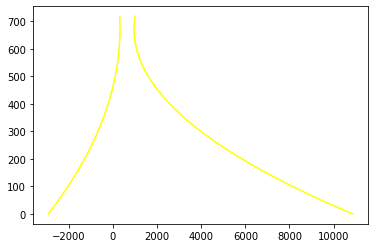

In [313]:
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')

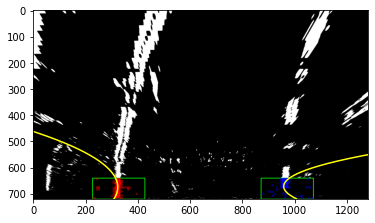

In [315]:
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.imshow(out_img)

0 (227, 640) (427, 720) (0, 255, 0) 2
1 (219, 560) (419, 640) (0, 255, 0) 2
2 (227, 480) (427, 560) (0, 255, 0) 2
3 (229, 400) (429, 480) (0, 255, 0) 2
4 (244, 320) (444, 400) (0, 255, 0) 2
5 (266, 240) (466, 320) (0, 255, 0) 2
6 (292, 160) (492, 240) (0, 255, 0) 2
7 (311, 80) (511, 160) (0, 255, 0) 2
8 (332, 0) (532, 80) (0, 255, 0) 2
left_fit [ 2.17600453e-04 -3.87364172e-01  4.78000379e+02]
right_fit [ 4.22146855e-04 -4.80877497e-01  1.11530271e+03]


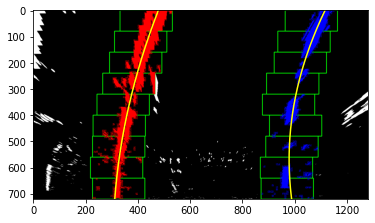

In [354]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# Load our image
binary_warped = mpimg.imread('warped-example.jpg')

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        
        ### TO-DO: Find the four below boundaries of the window ###
        # win_xleft_low = 0  # Update this
        # win_xleft_high = 0  # Update this
        # win_xright_low = 0  # Update this
        # win_xright_high = 0  # Update this
        win_xleft_low = int(np.max([leftx_current - margin, 0]))
        win_xleft_high = int(np.min([leftx_current + margin, binary_warped.shape[1]]))
        win_xright_low = int(np.max([rightx_current - margin, 0]))
        win_xright_high = int(np.min([rightx_current + margin, binary_warped.shape[1]]))
        
        print(window, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0, 255, 0), 2)
    
        cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0, 255, 0), 2)
        cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high), (0, 255, 0), 2)

        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        # good_left_inds = None
        # good_right_inds = None
        
        good_left_inds = []
        good_right_inds = []
        for i in range(len(nonzeroy)):    
            y = nonzeroy[i]
            x = nonzerox[i]
            
            if (win_y_low <= y) & (y <= win_y_high):
                if (win_xleft_low <= x) & (x <= win_xleft_high):
                    good_left_inds.append([y, x])
                if (win_xright_low <= x) & (x <= win_xright_high):            
                    good_right_inds.append([y, x])  
                    
        # Append these indices to the lists
#         left_lane_inds.append(good_left_inds)
#         right_lane_inds.append(good_right_inds)
        if len(good_left_inds) > 0:
            left_lane_inds.append(good_left_inds)
        if len(good_right_inds) > 0:
            right_lane_inds.append(good_right_inds)        
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        # pass # Remove this when you add your function
        if len(good_left_inds) > minpix:
            leftx_current = np.mean( np.array(good_left_inds)[:, 1:2] )

        if len(good_right_inds) > minpix:
            rightx_current = np.mean( np.array(good_right_inds)[:, 1:2] )            

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        # pass
        print('Error 1 out')

    # Extract left and right line pixel positions
    # leftx = nonzerox[left_lane_inds]
    # lefty = nonzeroy[left_lane_inds] 
    # rightx = nonzerox[right_lane_inds]
    # righty = nonzeroy[right_lane_inds]

    leftx = left_lane_inds[:, 1]
    lefty = left_lane_inds[:, 0]
    
    rightx = right_lane_inds[:, 1]
    righty = right_lane_inds[:, 0]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    # left_fit = None
    # right_fit = None
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    print('left_fit', left_fit)
    print('right_fit', right_fit)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img


out_img = fit_polynomial(binary_warped)

plt.imshow(out_img)